In [1]:
import pandas as pd
import numpy as np
import tweepy
import time
import json
import requests as req
import datetime
import config
from config import consumer_key, consumer_secret, access_token, access_token_secret
import matplotlib.pyplot as plt

In [2]:
consumer_key = config.consumer_key
consumer_secret = config.consumer_secret
access_token = config.access_token
access_token_secret = config.access_token_secret

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
twitter_account = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]

tweet_info = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_negative_score": [],
    "tweet_positive_score": [],
    "tweet_neutral_score": []
}

for x in range(5):
    for account in twitter_account:
        tweets = api.user_timeline(account, page=x)

        for tweet in tweets:
            tweet_info["tweet_source"].append(tweet["user"]["name"])
            tweet_info["tweet_text"].append(tweet["text"])
            tweet_info["tweet_date"].append(tweet["created_at"])

            tweet_info["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_info["tweet_positive_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_info["tweet_neutral_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_info["tweet_negative_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])



tweet_df = pd.DataFrame(tweet_info, columns=["tweet_source", 
                                             "tweet_text", 
                                             "tweet_date",
                                             "tweet_vader_score",
                                             "tweet_positive_score",
                                             "tweet_neutral_score",
                                             "tweet_negative_score"])

tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_positive_score,tweet_neutral_score,tweet_negative_score
0,Fox News,BREAKING: Federal appeals court rules against ...,Thu Nov 08 19:18:44 +0000 2018,0.0000,0.000,1.000,0.000
1,Fox News,Breaking News: Grand jury indicts captain of M...,Thu Nov 08 17:02:25 +0000 2018,-0.6124,0.115,0.615,0.269
2,Fox News,JUST IN: Police identify gunman who opened fir...,Thu Nov 08 15:14:45 +0000 2018,-0.7783,0.000,0.638,0.362
3,Fox News,JUST IN: Supreme Court Justice Ruth Bader Gins...,Thu Nov 08 14:22:51 +0000 2018,0.7906,0.389,0.611,0.000
4,Fox News,Sgt. Ron Helus was fatally shot when he respon...,Thu Nov 08 13:43:25 +0000 2018,-0.6369,0.000,0.833,0.167


In [41]:
tweet_df.to_csv("tweet_dataframe.csv", encoding="utf-8")

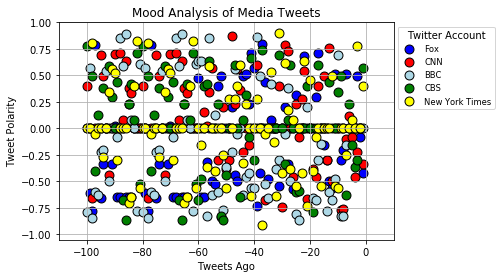

In [40]:
#fox
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "Fox News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "Fox News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="blue", label="Fox", s=80)

#cnn
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CNN"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", label="CNN", s=80)

#bbc
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="lightblue", label="BBC", s=80)

#cbs
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CBS News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CBS News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="green", label="CBS", s=80)

#new yor times
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "The New York Times"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "The New York Times"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="yellow", label="New York Times", s=80)

plt.title("Mood Analysis of Media Tweets")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-110, 10])
plt.ylim([-1.05, 1])
plt.grid(True)
lgnd = plt.legend(fontsize="small", loc="upper left", bbox_to_anchor=(1,1), title="Twitter Account", labelspacing=0.5)
plt.savefig("Mood Analysis of Media Tweets", bbox_inches='tight')
plt.show()

In [7]:
tweet_bar_data = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

# View the polarities
pd.DataFrame(tweet_bar_data)

,tweet_vader_score
tweet_source,
BBC News (World),-0.117693
CBS News,0.046330
CNN,0.069606
Fox News,-0.116200
The New York Times,0.003676


In [8]:
tweet_bar = (tweet_bar_data["BBC News (World)"], 
                    tweet_bar_data["CBS News"], 
                    tweet_bar_data["CNN"], 
                    tweet_bar_data["Fox News"],
                    tweet_bar_data["The New York Times"])
tweet_bar

(-0.117693,
 0.04633000000000001,
 0.069606,
 -0.11619999999999997,
 0.003676000000000003)

C:\Users\edgar\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


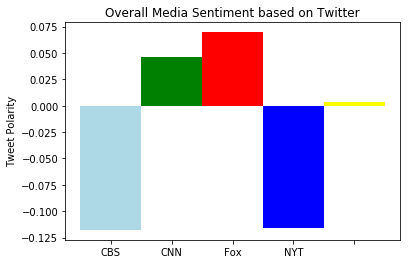

In [37]:
fig, ax= plt.subplots()
ind = np.arange(len(tweet_bar))
bbc_bar = ax.bar(ind[0], tweet_bar[0], width=1, color="lightblue")
cbs_bar = ax.bar(ind[1], tweet_bar[1], width=1, color="green")
cnn_bar = ax.bar(ind[2], tweet_bar[2], width=1, color="red")
foxnews_bar = ax.bar(ind[3], tweet_bar[3], width=1, color='blue')
newyorktime_bar = ax.bar(ind[4], tweet_bar[4], width=1, color='yellow')
 
ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter")
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
ax.set_autoscaley_on(True)
ax.grid(False)

fig.show()
plt.savefig("Overall Media Sentiment based on Twitter", bbox_inches='tight')